In [2]:
import maboss
import os
import numpy as np
import pandas as pd
import boolsim
from colomoto.minibn import BooleanNetwork
import time
from tqdm import tqdm

# Invasion
## Attractors simulation time

In [62]:
path = '/home/spankaew/Git/astrologics/models/Invasion/'
random_model_list = os.listdir(path)[0:99]

In [63]:
attractor_time_df = []

# Loop through the models
for i in random_model_list:
    # Load the model
    bn = BooleanNetwork.load(path + i)

    # Get the attractors
    start_time = time.time()
    a = boolsim.attractors(bn, update_mode='asynchronous')
    end_time = time.time()

    # Get the simulation time
    attractor_time = [end_time - start_time]

    # Concatenate the results
    attractor_time_df = attractor_time_df + attractor_time

In [64]:
simulation_time_df_1 = []

# For loop to run the MaBoSS simulations
for i in random_model_list:
    # Set the parameters
    initial_state = {'miR200':1,'miR203':1,'miR34':1}

    # Load model
    simulations = maboss.loadBNet(path + i)
    # Set the initial condition - all nodes
    node_names = simulations.network.names
    assigned_node = list(initial_state.keys())
    unassigned_node = list(set(node_names) - set(assigned_node))

    # Set the initial condition - assigned node
    for i in assigned_node:
        simulations.network.set_istate(i, [1 - initial_state[i], initial_state[i]])

    # Set the initial condition - unassigned node
    for i in unassigned_node:
        simulations.network.set_istate(i, [0.5, 0.5])

    # Set up the simulation parameters
    simulations.update_parameters(max_time = 20,thread_count = 15, sample_count = 1000)

    # Set the output of the simulation
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    start_time = time.time()
    simulations.run()
    end_time = time.time()

    # Get the simulation time
    simulation_time = [end_time - start_time]

    # Get the simulation time matrix
    simulation_time_df_1 = simulation_time_df_1 + simulation_time

In [65]:
simulation_time_df_2 = []

# For loop to run the MaBoSS simulations
for i in random_model_list:
    # Set the parameters
    initial_state = {'miR200':1,'miR203':1,'miR34':1}

    # Load model
    simulations = maboss.loadBNet(path + i)
    # Set the initial condition - all nodes
    node_names = simulations.network.names
    assigned_node = list(initial_state.keys())
    unassigned_node = list(set(node_names) - set(assigned_node))

    # Set the initial condition - assigned node
    for i in assigned_node:
        simulations.network.set_istate(i, [1 - initial_state[i], initial_state[i]])

    # Set the initial condition - unassigned node
    for i in unassigned_node:
        simulations.network.set_istate(i, [0.5, 0.5])

    # Set up the simulation parameters
    simulations.update_parameters(max_time = 20,thread_count = 15, sample_count = 2500)

    # Set the output of the simulation
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    start_time = time.time()
    simulations.run()
    end_time = time.time()

    # Get the simulation time
    simulation_time = [end_time - start_time]

    # Get the simulation time matrix
    simulation_time_df_2 = simulation_time_df_2 + simulation_time

In [66]:
simulation_time_df_3 = []

# For loop to run the MaBoSS simulations
for i in random_model_list:
    # Set the parameters
    initial_state = {'miR200':1,'miR203':1,'miR34':1}

    # Load model
    simulations = maboss.loadBNet(path + i)
    # Set the initial condition - all nodes
    node_names = simulations.network.names
    assigned_node = list(initial_state.keys())
    unassigned_node = list(set(node_names) - set(assigned_node))

    # Set the initial condition - assigned node
    for i in assigned_node:
        simulations.network.set_istate(i, [1 - initial_state[i], initial_state[i]])

    # Set the initial condition - unassigned node
    for i in unassigned_node:
        simulations.network.set_istate(i, [0.5, 0.5])

    # Set up the simulation parameters
    simulations.update_parameters(max_time = 20,thread_count = 15, sample_count = 5000)

    # Set the output of the simulation
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    start_time = time.time()
    simulations.run()
    end_time = time.time()

    # Get the simulation time
    simulation_time = [end_time - start_time]

    # Get the simulation time matrix
    simulation_time_df_3 = simulation_time_df_3 + simulation_time

In [67]:
simulation_time_df_4 = []

# For loop to run the MaBoSS simulations
for i in random_model_list:
    # Set the parameters
    initial_state = {'miR200':1,'miR203':1,'miR34':1}

    # Load model
    simulations = maboss.loadBNet(path + i)
    # Set the initial condition - all nodes
    node_names = simulations.network.names
    assigned_node = list(initial_state.keys())
    unassigned_node = list(set(node_names) - set(assigned_node))

    # Set the initial condition - assigned node
    for i in assigned_node:
        simulations.network.set_istate(i, [1 - initial_state[i], initial_state[i]])

    # Set the initial condition - unassigned node
    for i in unassigned_node:
        simulations.network.set_istate(i, [0.5, 0.5])

    # Set up the simulation parameters
    simulations.update_parameters(max_time = 20,thread_count = 15, sample_count = 10000)

    # Set the output of the simulation
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    start_time = time.time()
    simulations.run()
    end_time = time.time()

    # Get the simulation time
    simulation_time = [end_time - start_time]

    # Get the simulation time matrix
    simulation_time_df_4 = simulation_time_df_4 + simulation_time

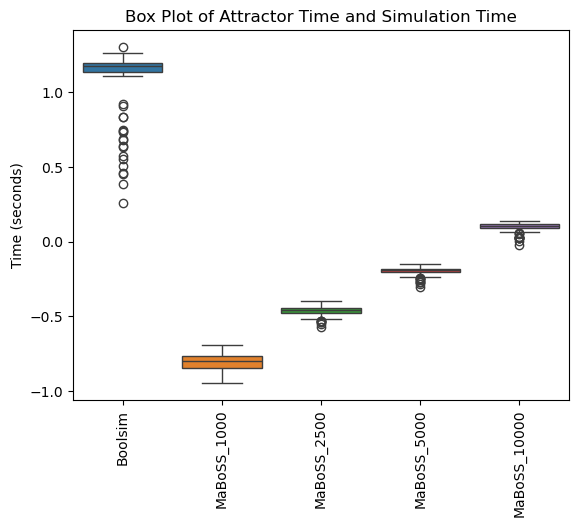

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
overall_time = pd.DataFrame([attractor_time_df,simulation_time_df_1,simulation_time_df_2,simulation_time_df_3,simulation_time_df_4], 
                            index = ['Boolsim','MaBoSS_1000',
                                     'MaBoSS_2500','MaBoSS_5000','MaBoSS_10000']).T
overall_time.to_csv('comparing_SimulationTime_Invasion.csv')

# Create a box plot
sns.boxplot(data=np.log10(overall_time))
plt.title("Box Plot of Attractor Time and Simulation Time")
plt.ylabel("Time (log10 seconds))")
plt.xticks(rotation= 90)
plt.show()